**Завдання 1. Провести всі операції, описані в лабораторній роботі, побудувати та навчити модель**

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers 
from keras.utils.np_utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

Завантажимо датасет cifar10 та запишемо його у змінні.

In [ ]:
from keras.datasets import cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Виведемо декілька зображень, щоб переконатися, що все пройшло успішно

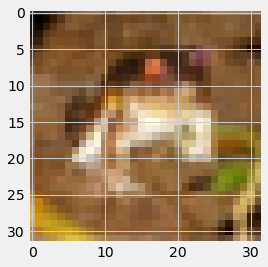

In [ ]:
img = plt.imshow(x_train[0])

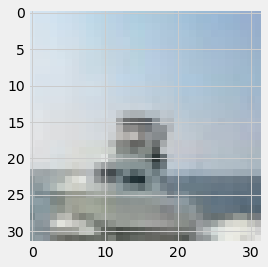

In [ ]:
img = plt.imshow(x_train[100])

Дамо назви кожному з класів, для зрозуміліших результатів

In [ ]:
classification = ['airplane', 'automobile', 'bird', 'cat','deer', 
                  'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is: ', classification[y_train[100][0]])

The image class is:  ship


Сформуємо вектори-виходи, де правильний клас позначається одиницею

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_test_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Нормалізуємо наші зображення, встановивши значення від 0 до 1

In [ ]:
x_train = x_train / 255 
x_test = x_test / 255

Побудуємо архітектуру нашої мережі

In [ ]:
basic_model = Sequential([Conv2D(32, (5, 5), activation='relu', 
                                 input_shape=(32,32,3)),
                          MaxPooling2D(pool_size=(2, 2)),
                          Conv2D(64, (5, 5), activation='relu'),
                          MaxPooling2D(pool_size=(2, 2)),
                          Flatten(),
                          Dense(1000, activation='relu'),
                          Dropout(0.5),
                          Dense(500, activation='relu'),
                          Dropout(0.5),
                          Dense(250, activation='relu'),
                          Dense(10, activation='softmax')])

Скомпілюємо нашу модель та проведемо навчання

In [ ]:
basic_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
basic_history = basic_model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 4s 22ms/step - loss: 1.8128 - accuracy: 0.3176 - val_loss: 1.4713 - val_accuracy: 0.4598
Epoch 2/10
157/157 [==============================] - 3s 20ms/step - loss: 1.3885 - accuracy: 0.4945 - val_loss: 1.2758 - val_accuracy: 0.5375
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 1.2340 - accuracy: 0.5584 - val_loss: 1.1760 - val_accuracy: 0.5755
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 1.1179 - accuracy: 0.6023 - val_loss: 1.0687 - val_accuracy: 0.6216
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 1.0201 - accuracy: 0.6410 - val_loss: 1.0472 - val_accuracy: 0.6363
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.9428 - accuracy: 0.6664 - val_loss: 0.9834 - val_accuracy: 0.6543
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.8639 - accuracy: 0.6961 - val_loss: 0.9304 - val_accuracy: 0.6769

Візуалізуємо результати, побудувавши графіки точності та втрат на тренувальних та тестових вибірках вибірках.

Text(0.5, 1.0, 'Графіки точності базової моделі')

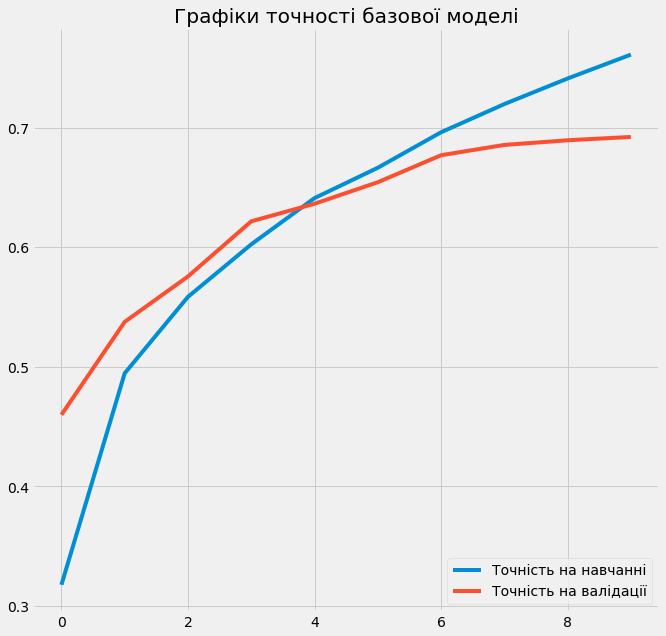

In [ ]:
acc = basic_history.history['accuracy']
val_acc = basic_history.history['val_accuracy']

epochs_range = range(10)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, acc, label='Точність на навчанні')
plt.plot(epochs_range, val_acc, label='Точність на валідації')
plt.legend(loc='lower right')
plt.title(f'Графіки точності базової моделі')

Text(0.5, 1.0, 'Графіки втрат базової моделі')

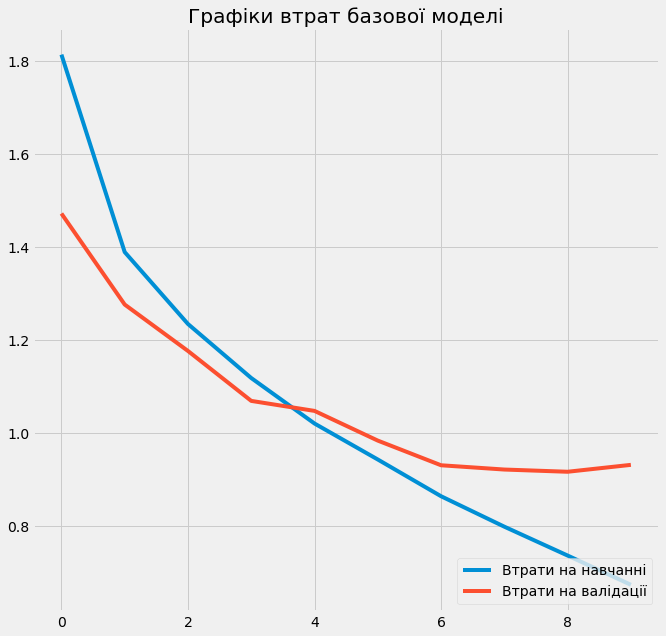

In [ ]:
loss = basic_history.history['loss']
val_loss = basic_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, loss, label='Втрати на навчанні')
plt.plot(epochs_range, val_loss, label='Втрати на валідації')
plt.legend(loc='lower right')
plt.title(f'Графіки втрат базової моделі')

Протестуємо нашу модель на зображенні, що не входить до датасету.

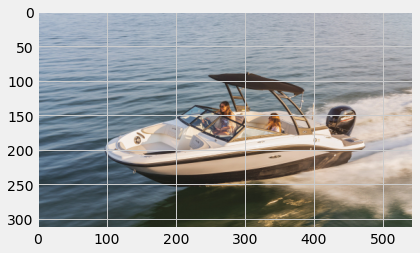

In [ ]:
from skimage.transform import resize

new_image = plt.imread("boat.jpg")
img = plt.imshow(new_image)

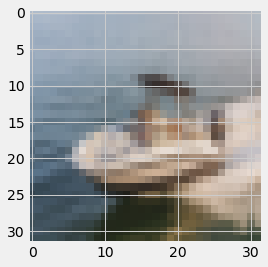

In [ ]:
resized_image = resize(new_image, (32,32,3)) 
img = plt.imshow(resized_image)

In [ ]:
predictions = basic_model.predict(np.array([resized_image]))
predictions 

array([[5.0022084e-02, 3.3464241e-03, 2.2045691e-03, 2.3366883e-04,
        3.7163292e-04, 3.1689637e-05, 6.6611951e-04, 2.1196371e-05,
        9.4145256e-01, 1.6499481e-03]], dtype=float32)

In [ ]:
predictions = predictions.tolist()[0]
sorted_predictions = []
for i in range(10):
  sorted_predictions.append([predictions[i], i])
sorted_predictions.sort()
sorted_predictions

[[2.1196370653342456e-05, 7],
 [3.168963667121716e-05, 5],
 [0.00023366883397102356, 3],
 [0.0003716329229064286, 4],
 [0.0006661195075139403, 6],
 [0.0016499480698257685, 9],
 [0.0022045690566301346, 2],
 [0.0033464240841567516, 1],
 [0.05002208426594734, 0],
 [0.9414525628089905, 8]]

In [ ]:
for i in range(9, 4, -1): 
  print(classification[sorted_predictions[i][1]], ':', round(sorted_predictions[i][0] * 100, 2), '%')

ship : 94.15 %
airplane : 5.0 %
automobile : 0.33 %
bird : 0.22 %
truck : 0.16 %


Дана модель змогла класифікувати зображення, як човен з імовірністю 99.8 %.

** Змінити модель глибокої конволюційної мережі (додати додаткові шариконволюції і пулінга, поміняти в них параметри ядер, змінити параметри шарівDropout, поміняти кількість нейронів в шарах багатошарового персептрона, змінити алгоритм навчання) для досягення точность більше ніж 70,43%3.**

Модифікуємо деякі параметри нашої моделі для досягнення кращих результатів

In [ ]:
better_model = Sequential([Conv2D(64, (3, 3), activation='relu', 
                                 input_shape=(32,32,3)),
                          MaxPooling2D(pool_size=(2, 2)),
                          Conv2D(128, (3, 3), activation='relu'),
                          MaxPooling2D(pool_size=(2, 2)),
                          Flatten(),
                          Dense(512, activation='relu'),
                          Dropout(0.50),
                          Dense(512, activation='relu'),
                          Dropout(0.50),
                          Dense(256, activation='relu'),
                          Dense(10, activation='softmax')])

In [ ]:
better_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
better_history = better_model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 32ms/step - loss: 1.7776 - accuracy: 0.3307 - val_loss: 1.4559 - val_accuracy: 0.4628
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 1.3696 - accuracy: 0.5017 - val_loss: 1.2256 - val_accuracy: 0.5667
Epoch 3/10
157/157 [==============================] - 4s 28ms/step - loss: 1.1743 - accuracy: 0.5806 - val_loss: 1.0744 - val_accuracy: 0.6159
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 1.0474 - accuracy: 0.6336 - val_loss: 0.9811 - val_accuracy: 0.6586
Epoch 5/10
157/157 [==============================] - 4s 28ms/step - loss: 0.9542 - accuracy: 0.6668 - val_loss: 0.9444 - val_accuracy: 0.6677
Epoch 6/10
157/157 [==============================] - 4s 28ms/step - loss: 0.8717 - accuracy: 0.6961 - val_loss: 0.8912 - val_accuracy: 0.6914
Epoch 7/10
157/157 [==============================] - 4s 28ms/step - loss: 0.7952 - accuracy: 0.7198 - val_loss: 0.8862 - val_accuracy: 0.6963

Text(0.5, 1.0, 'Графіки точності покращеної моделі')

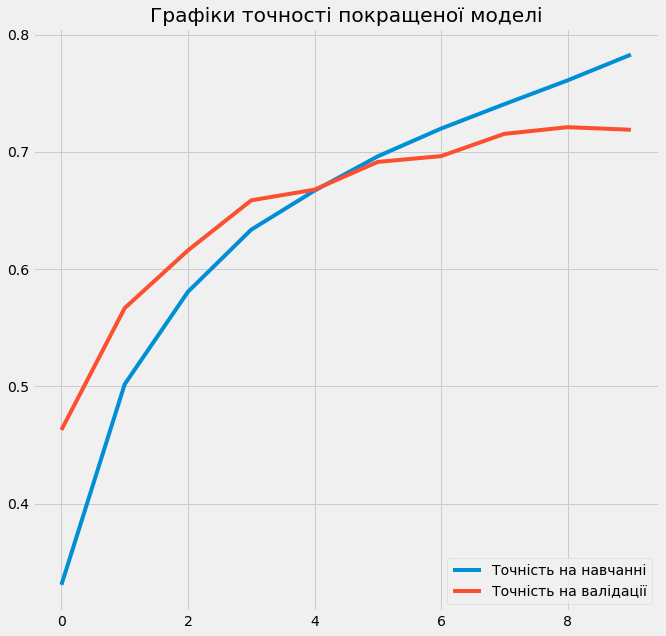

In [ ]:
acc = better_history.history['accuracy']
val_acc = better_history.history['val_accuracy']

epochs_range = range(10)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, acc, label='Точність на навчанні')
plt.plot(epochs_range, val_acc, label='Точність на валідації')
plt.legend(loc='lower right')
plt.title(f'Графіки точності покращеної моделі')

Text(0.5, 1.0, 'Графіки втрат покращеної моделі')

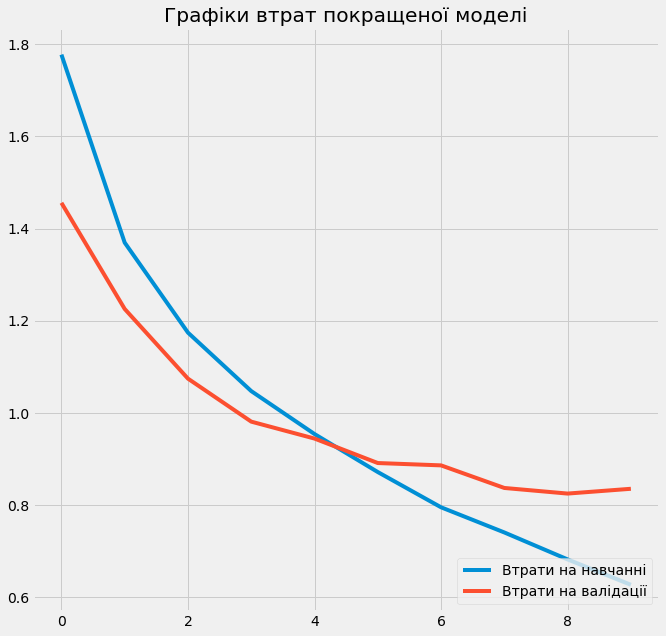

In [ ]:
loss = better_history.history['loss']
val_loss = better_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, loss, label='Втрати на навчанні')
plt.plot(epochs_range, val_loss, label='Втрати на валідації')
plt.legend(loc='lower right')
plt.title(f'Графіки втрат покращеної моделі')

In [ ]:
advanced_model = Sequential([Conv2D(64, (4, 4), activation='relu', 
                                 input_shape=(32,32,3)),
                          Conv2D(128, (3, 3), activation='relu'),
                          MaxPooling2D(pool_size=(2, 2)),
                          Conv2D(128, (3, 3), activation='relu'),
                          Conv2D(256, (2, 2), activation='relu'),
                          MaxPooling2D(pool_size=(2, 2)),
                          Flatten(),
                          Dense(512, activation='relu'),
                          Dropout(0.5),
                          Dense(256, activation='relu'),
                          Dropout(0.35),
                          Dense(10, activation='softmax')])

In [ ]:
advanced_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
advanced_history = advanced_model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 85ms/step - loss: 1.8053 - accuracy: 0.3238 - val_loss: 1.4705 - val_accuracy: 0.4591
Epoch 2/10
157/157 [==============================] - 13s 83ms/step - loss: 1.3988 - accuracy: 0.4908 - val_loss: 1.3034 - val_accuracy: 0.5339
Epoch 3/10
157/157 [==============================] - 13s 83ms/step - loss: 1.2017 - accuracy: 0.5717 - val_loss: 1.1041 - val_accuracy: 0.6138
Epoch 4/10
157/157 [==============================] - 13s 83ms/step - loss: 1.0274 - accuracy: 0.6403 - val_loss: 0.9250 - val_accuracy: 0.6750
Epoch 5/10
157/157 [==============================] - 13s 83ms/step - loss: 0.9020 - accuracy: 0.6879 - val_loss: 0.8557 - val_accuracy: 0.7069
Epoch 6/10
157/157 [==============================] - 13s 83ms/step - loss: 0.8021 - accuracy: 0.7223 - val_loss: 0.8160 - val_accuracy: 0.7181
Epoch 7/10
157/157 [==============================] - 13s 83ms/step - loss: 0.7279 - accuracy: 0.7463 - val_loss: 0.7889 - val_accuracy:

Text(0.5, 1.0, 'Графіки точності нової моделі')

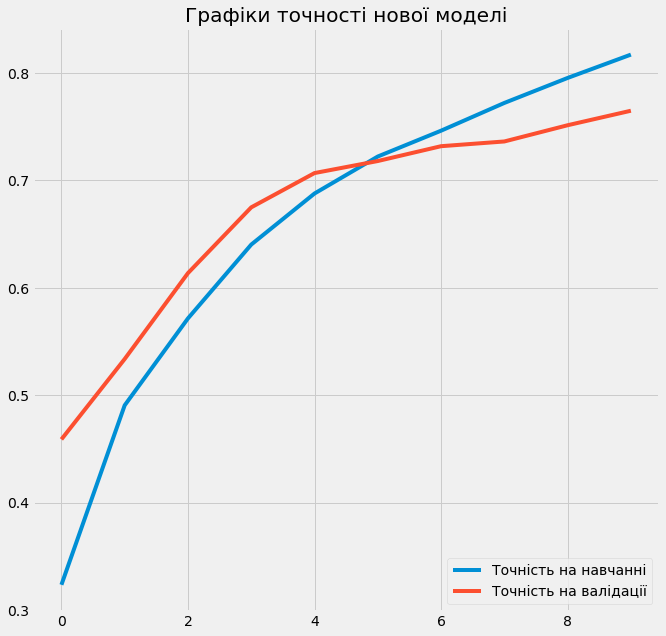

In [ ]:
acc = advanced_history.history['accuracy']
val_acc = advanced_history.history['val_accuracy']

epochs_range = range(10)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, acc, label='Точність на навчанні')
plt.plot(epochs_range, val_acc, label='Точність на валідації')
plt.legend(loc='lower right')
plt.title(f'Графіки точності нової моделі')

Text(0.5, 1.0, 'Графіки втрат нової моделі')

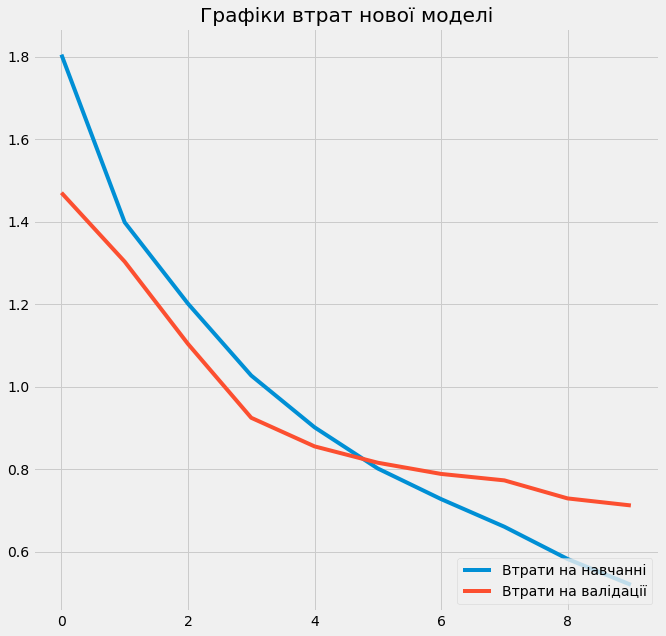

In [ ]:
loss = advanced_history.history['loss']
val_loss = advanced_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, loss, label='Втрати на навчанні')
plt.plot(epochs_range, val_loss, label='Втрати на валідації')
plt.legend(loc='lower right')
plt.title(f'Графіки втрат нової моделі')

Text(0.5, 1.0, 'Графіки точності на валідації всіх моделей')

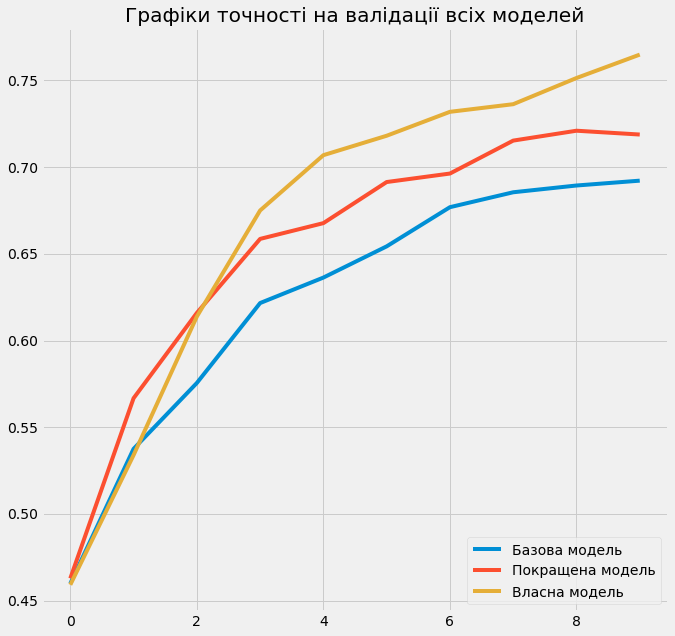

In [ ]:
val_acc = basic_history.history['val_accuracy']
b_val_acc = better_history.history['val_accuracy']
a_val_acc = advanced_history.history['val_accuracy']

epochs_range = range(10)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, val_acc, label='Базова модель')
plt.plot(epochs_range, b_val_acc, label='Покращена модель')
plt.plot(epochs_range, a_val_acc, label='Власна модель')
plt.legend(loc='lower right')
plt.title(f'Графіки точності на валідації всіх моделей')

Text(0.5, 1.0, 'Графіки втрат на валідації всіх моделей')

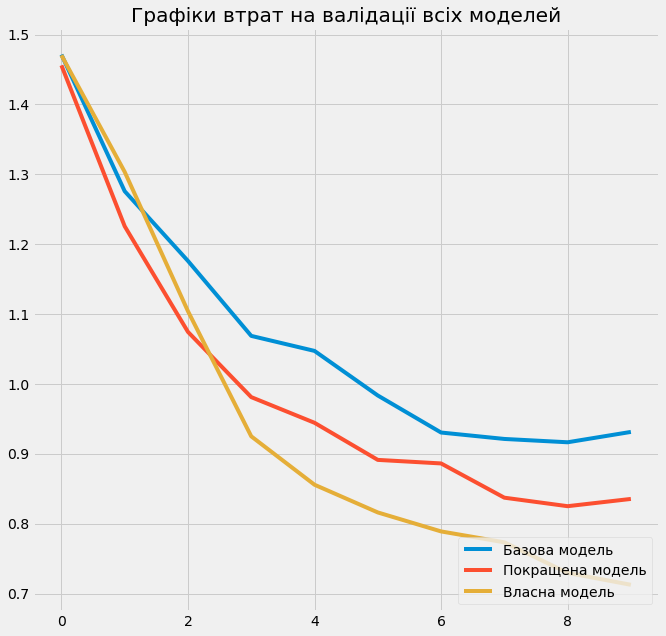

In [ ]:
val_loss = basic_history.history['val_loss']
b_val_loss = better_history.history['val_loss']
a_val_loss = advanced_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, val_loss, label='Базова модель')
plt.plot(epochs_range, b_val_loss, label='Покращена модель')
plt.plot(epochs_range, a_val_loss, label='Власна модель')
plt.legend(loc='lower right')
plt.title(f'Графіки втрат на валідації всіх моделей')

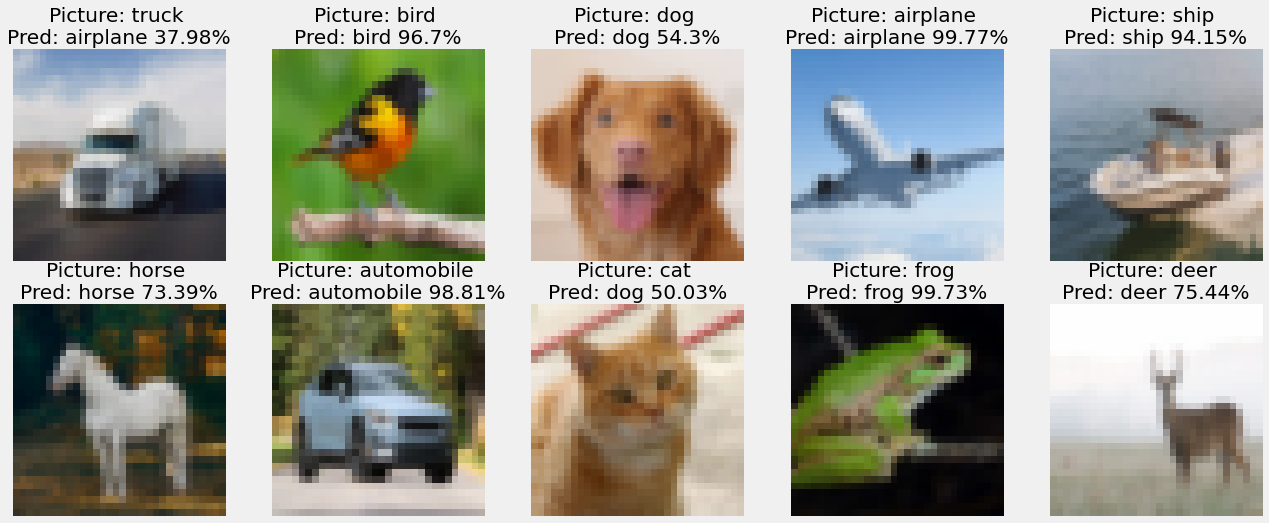

In [ ]:
import os

pictures = os.listdir('pics')
pic_box = plt.figure(figsize=(20, 8))

for i, picture_name in enumerate(pictures):
  picture = resize(plt.imread('pics/' + picture_name), (32, 32, 3))
  ax = pic_box.add_subplot(2, 5, i+1)
  plt.imshow(picture)

  predictions = basic_model.predict(np.array([picture]))
  predictions = predictions.tolist()[0]
  sorted_predictions = []
  for i in range(10):
    sorted_predictions.append([predictions[i], i])
    sorted_predictions.sort()
  ax.set_title(f"Picture: {picture_name[:-4]} \nPred: {classification[sorted_predictions[9][1]]} {round(sorted_predictions[9][0] * 100, 2)}%")
  plt.axis('off')

plt.show() 

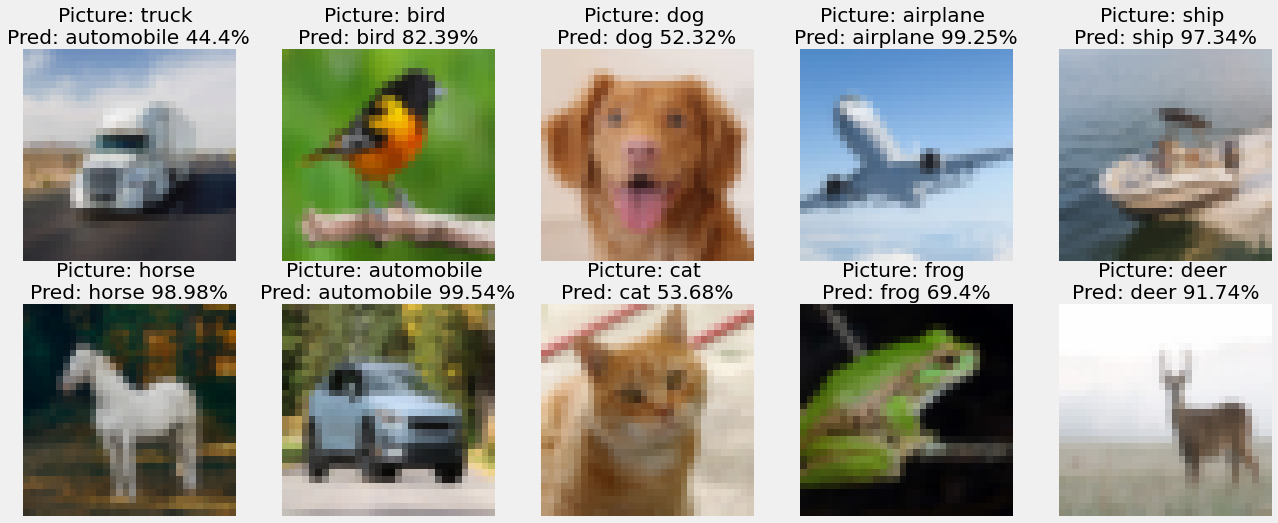

In [ ]:
pictures = os.listdir('pics')
pic_box = plt.figure(figsize=(20, 8))

for i, picture_name in enumerate(pictures):
  picture = resize(plt.imread('pics/' + picture_name), (32, 32, 3))
  ax = pic_box.add_subplot(2, 5, i+1)
  plt.imshow(picture)

  predictions = better_model.predict(np.array([picture]))
  predictions = predictions.tolist()[0]
  sorted_predictions = []
  for i in range(10):
    sorted_predictions.append([predictions[i], i])
    sorted_predictions.sort()
  ax.set_title(f"Picture: {picture_name[:-4]} \nPred: {classification[sorted_predictions[9][1]]} {round(sorted_predictions[9][0] * 100, 2)}%")
  plt.axis('off')

plt.show() 

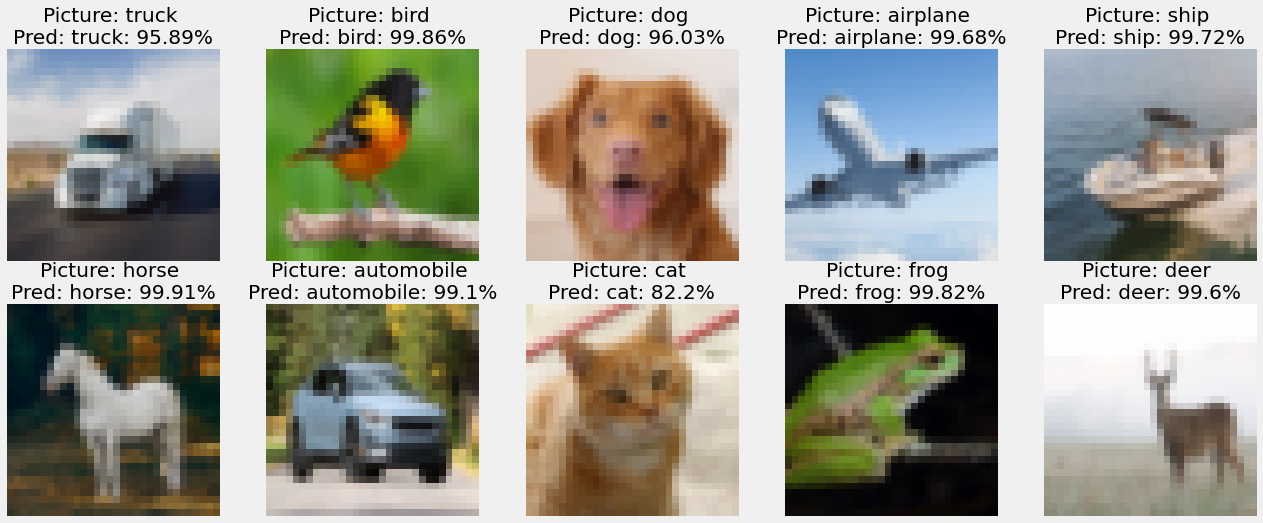

In [ ]:
pictures = os.listdir('pics')
pic_box = plt.figure(figsize=(20, 8))

for i, picture_name in enumerate(pictures):
  picture = resize(plt.imread('pics/' + picture_name), (32, 32, 3))
  ax = pic_box.add_subplot(2, 5, i+1)
  plt.imshow(picture)

  predictions = advanced_model.predict(np.array([picture]))
  predictions = predictions.tolist()[0]
  sorted_predictions = []
  for i in range(10):
    sorted_predictions.append([predictions[i], i])
    sorted_predictions.sort()
  ax.set_title(f"Picture: {picture_name[:-4]} \nPred: {classification[sorted_predictions[9][1]]}: {round(sorted_predictions[9][0] * 100, 2)}%")
  plt.axis('off')

plt.show() 